# Assignment 06
***

---
### 모듈 정의


#### 그래프를 그리기 위해 Python3 matplotlib module 을 사용합니다

In [2]:
import matplotlib.pyplot as plt
import numpy as np

---

## 1. 기본 데이터 입력받기

- Row, Col, Distance type을 입력받습니다.


In [9]:
rows = int(input("# of Row?"))
cols = int(input("# of Columns?"))
dist = int(input("Distance type <1: L1 norm , 2: L2 norm>?"))

# of Row?50
# of Columns?45
Distance type <1: L1 norm , 2: L2 norm>?1


## 2. 필요 함수 선언

---
#### init 함수
- label이 들어갈 matrix를 입력받은 rows, cols으로 만들고 랜덤 label값을 넣습니다.
- x1,x2(위치좌표) matrix를 만듭니다.
- 총 3개의 matrix를 구성하여 반환합니다.


In [3]:
def init(rows,cols,K):
    label_matrix = np.random.randint(K, size=(rows, cols))
    x1 = np.zeros((rows * cols), dtype=int)
    x2 = np.zeros((rows * cols), dtype=int)
    for row in range(0,rows):
        for col in range(0,cols):
            index = (row * cols) + col
            x1[index] = row
            x2[index] = col
    return label_matrix, x1, x2


#### get_locate_by_label 함수
- 배정받은 클러스터의 label 별로 위치좌표를 모읍니다.
- 각각의 label 별로 dic변수에 저장되어 반환해줍니다.
- 결과적으로 반환 값은 label별로 모여 있는 위치좌표들을 받습니다.

In [4]:
def get_locate_by_label(x1,x2,label_matrix):
    dic = dict()
    for i in range(0, len(x1)):
        row = x1[i]
        col = x2[i]
        data = label_matrix[row][col]
        if data not in dic:
            dic[data] = []
            dic[data].append([row,col])
        else:
            dic[data].append([row,col])

    return dic


#### centroid_select 함수
- get_locate_by_label에서 받은 label별로 모여있는 위치정보들의 centroid를 만드는 작업을 합니다.
- 각 label 별로 저장되어있는 모든 위치정보의 합을 각 label 별로 저장되어있는 모든 위치좌표의 수로 나눕니다. (중심값을 얻습니다.)
- 결과적으로 centroid에 각 클러스터 별 centroid의 값을 저장하게 됩니다.

In [5]:
def centroid_select(dic):
    centroid = dict()
    for i in dic:
        centroid[i] = np.linalg.norm(dic[i], ord=1,axis=0)/len(dic[i])
        centroid[i] = [int(centroid[i][0]), int(centroid[i][1])]
    return centroid


#### locate2cluster 함수
- 다시 모든 위치좌표를 각 클러스터의 centroid와의 거리를 구하여 가장 거리가 짧은 cenroid의 label을 따라갑니다.
- 파라미터로 받는 dist는 np.linalg.norm의 ord의 파라미터로 전달되며 이는 L1과 L2 norm을 결정합니다.

In [6]:
def locate2cluster(label_matrix,x1,x2,centroid,dist):
    for i in range(0, len(x1)):
        row = x1[i]
        col = x2[i]
        minDist = 99999999
        label = 99999999
        for i in range(0,len(centroid)):
            temp = [centroid[i][0] - row, centroid[i][1] - col]
            dist = np.linalg.norm(temp,ord=dist)
            if minDist > dist:
                minDist = dist
                label = i 
        label_matrix[row][col] = label

    return label_matrix


#### get_energyfunction_val 함수와 show_energyfunction 함수
- energy function의 값을 구하는 함수입니다.


$$ \frac{1}{K}\sum_{k = 1}^K \| x_i - c_{k_i} \|^2 $$
- where $k_i$ denotes the category of $x_i$, and $c_{k_i}$ denotes the centroid of category $x_i$.

위 연산을 구현한 것으로 클러스터별 pixels 와 centroid의 norm을 구하고 클러스터별 value를 모두 더하여 K만큼 나눕니다.

- show_energyfunction는 get_energyfunction_val에서 받은 energy의 값을 가지고 plot을 해주는 함수입니다.

In [7]:
def get_energyfunction_val(cluster,centroids,K): 
    val = 0
    for i in cluster:
        val = val + np.linalg.norm(np.subtract(cluster[i], centroid[i]))
    return val / K

def show_energyfunction(iter,energy):
    plt.xlabel("iterator")
    plt.ylabel("energy")
    plt.plot(range(0,iter), energy)
    plt.show()

## 3. 테스트(Energy 함수와 결과 이미지 비교)

---
### K=7 // iterator = 10 // L1-NORM으로 거리를 구할때
### 최적화 과정에서의 중심좌표의 변화와 에너지함수 그래프

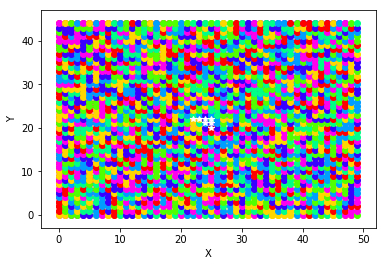

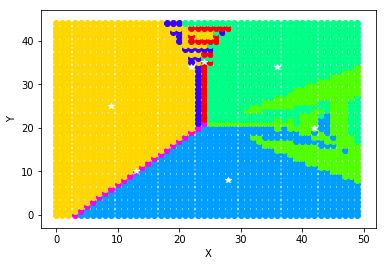

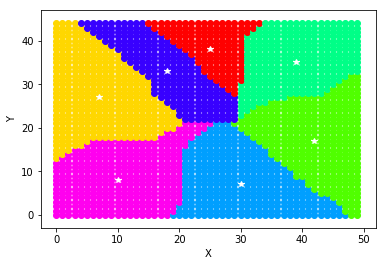

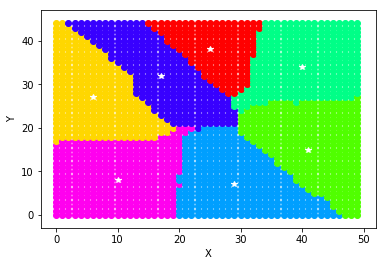

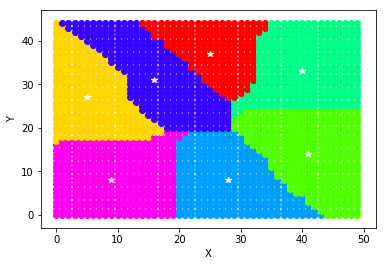

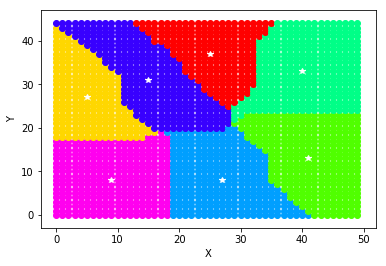

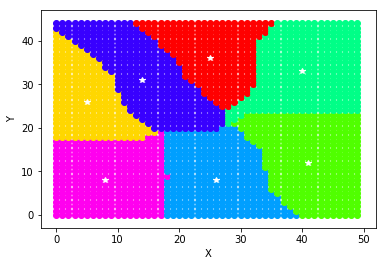

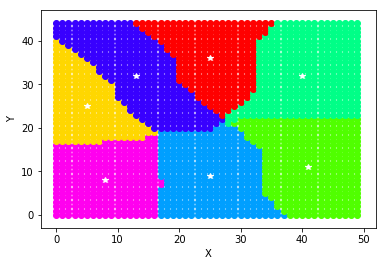

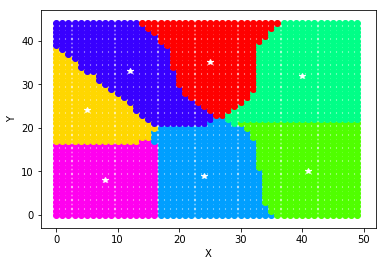

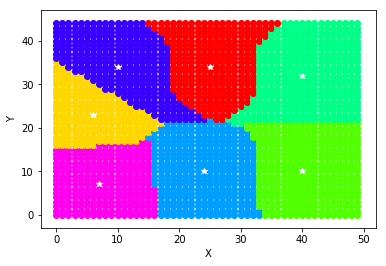

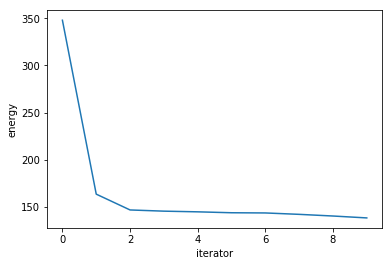

In [17]:
energy = []
iterator = 10
K = 7
# 랜덤으로 배정받을때 중복된 좌표를 얻을 경우가 생기므로 중복이면 다시 랜덤하게 배정함
while True:
    label_matrix , x1, x2 = init(rows,cols,K)
    dic = get_locate_by_label(x1,x2,label_matrix)
    centroid  = centroid_select(dic)
    if len(list(set([tuple(set(item)) for item in [*centroid.values()] ]))) == K:
        break


for x in range(0,iterator):
    # 결과 그래프를 그려주는 부분
    cmap = plt.cm.get_cmap("hsv", K+1)
    plt.xlabel("X")
    plt.ylabel("Y")

    for i in range(0, len(x1)):
        row = x1[i]
        col = x2[i]
        for i in range(0, K):
            if label_matrix[row][col] == i:
                plt.scatter(row, col,c=cmap(i))

    # 중심 좌표를 *으로 표현해주는 부분
    for x in range(0,len(centroid)):
        plt.plot(centroid[x][0], centroid[x][1],"w*")
    plt.show()
    
    label_matrix = locate2cluster(label_matrix,x1,x2,centroid,dist)
    energy.append(get_energyfunction_val(dic,centroid,K))

    dic = get_locate_by_label(x1,x2,label_matrix)
    centroid  = centroid_select(dic)
    
    

show_energyfunction(iterator,energy)


---
### K=7 // iterator = 10 // L2-NORM으로 거리를 구할때
### 최적화 과정에서의 중심좌표의 변화와 에너지함수 그래프

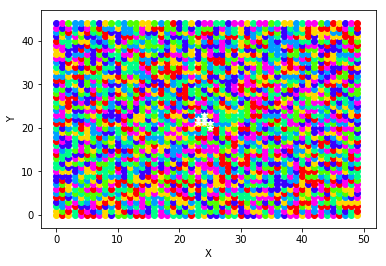

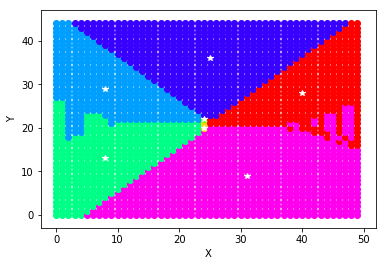

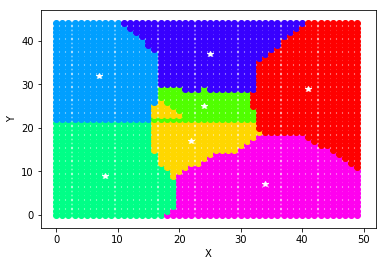

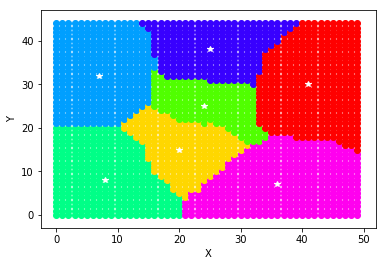

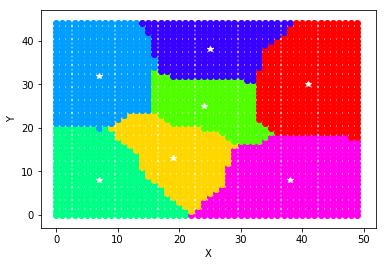

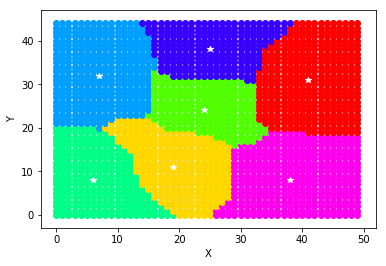

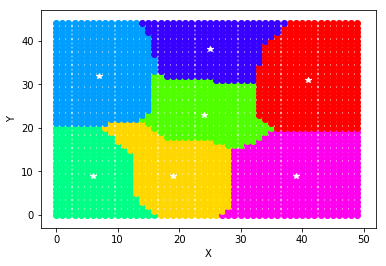

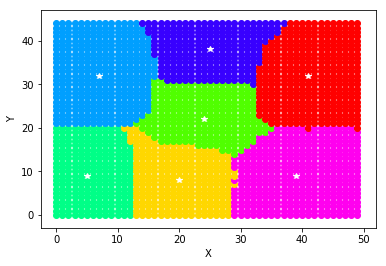

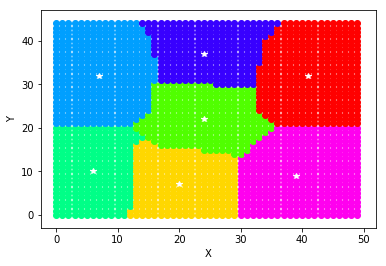

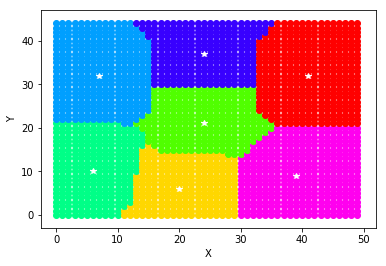

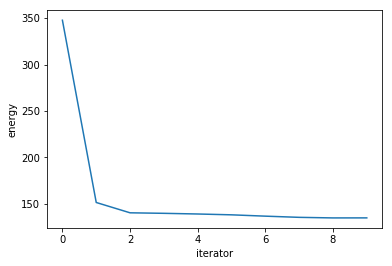

In [18]:
K = 7
energy = []
iterator = 10
# 랜덤으로 배정받을때 중복된 좌표를 얻을 경우가 생기므로 중복이면 다시 랜덤하게 배정함
while True:
    label_matrix , x1, x2 = init(rows,cols,K)
    dic = get_locate_by_label(x1,x2,label_matrix)
    centroid  = centroid_select(dic)
    if len(list(set([tuple(set(item)) for item in [*centroid.values()] ]))) == K:
        break


for x in range(0,iterator):
    # 결과 그래프를 그려주는 부분
    cmap = plt.cm.get_cmap("hsv", K+1)
    plt.xlabel("X")
    plt.ylabel("Y")

    for i in range(0, len(x1)):
        row = x1[i]
        col = x2[i]
        for i in range(0, K):
            if label_matrix[row][col] == i:
                plt.scatter(row, col,c=cmap(i))
    
    # 중심 좌표를 *으로 표현해주는 부분
    for x in range(0,len(centroid)):
        plt.plot(centroid[x][0], centroid[x][1],"w*")
    plt.show()

    label_matrix = locate2cluster(label_matrix,x1,x2,centroid,2)
    energy.append(get_energyfunction_val(dic,centroid,K))

    dic = get_locate_by_label(x1,x2,label_matrix)
    centroid  = centroid_select(dic)
    
    
show_energyfunction(iterator,energy)
